In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AMZN.csv')

In [3]:
df = df.drop(columns=['Adj Close'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

5006

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [8.83745778e-01],
       [8.75804758e-01],
       [8.77099681e-01]])

In [6]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([1.50803720e-04, 8.93653463e-05, 8.37798446e-05, 6.42313929e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267042e-05, 5.02679068e-05,
       3.63046887e-05, 2.93229456e-05, 2.79267042e-05, 3.07194551e-05,
       2.23414706e-05, 5.58550171e-06, 3.90974396e-05, 6.98166266e-05,
       7.81946110e-05, 5.02679068e-05, 3.90974396e-05, 5.58534085e-05,
       5.02679068e-05, 4.74754240e-05, 2.93229456e-05, 3.07194551e-05,
       3.07194551e-05, 3.49084473e-05, 2.79267042e-05, 3.07194551e-05,
       3.07194551e-05, 3.07194551e-05, 2.51339534e-05, 3.90974396e-05,
       3.21156965e-05, 5.16644163e-05, 1.38236744e-04, 1.61974456e-04,
       2.42961549e-04, 2.48547051e-04, 3.12778176e-04, 2.40169067e-04,
       1.98279144e-04, 2.79266238e-04, 2.51339534e-04, 2.20620347e-04,
       2.03864378e-04, 2.10846121e-04, 1.98279144e-04, 2.40169067e-04,
       2.31791082e-04, 2.23413098e-04, 2.48547051e-04, 2.90436973e-04,
       2.82058989e-04, 2.68095503e-04, 2.73681005e-04, 2.45754300e-04,
     

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4946, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
4946/4946 [==============================] - 178s 35ms/step - loss: 6.7517e-05
Epoch 2/10
4946/4946 [==============================] - 165s 33ms/step - loss: 2.6231e-05
Epoch 3/10
4946/4946 [==============================] - 166s 34ms/step - loss: 1.6590e-05
Epoch 4/10
4946/4946 [==============================] - 166s 34ms/step - loss: 1.3705e-05
Epoch 5/10
4946/4946 [==============================] - 174s 35ms/step - loss: 1.3727e-05
Epoch 6/10
4946/4946 [==============================] - 165s 33ms/step - loss: 1.0429e-05
Epoch 7/10
4946/4946 [==============================] - 164s 33ms/step - loss: 1.0332e-05
Epoch 8/10
4946/4946 [==============================] - 168s 34ms/step - loss: 9.2641e-06
Epoch 9/10
4946/4946 [==============================] - 165s 33ms/step - loss: 9.9401e-06
Epoch 10/10
4946/4946 [==============================] - 166s 34ms/step - loss: 7.8525e-06


In [12]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [13]:
x_test = np.array(x_test)

In [14]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1251, 60, 1)

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

40/40 [==============================] - 2s 22ms/step


In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

300.1562094426771

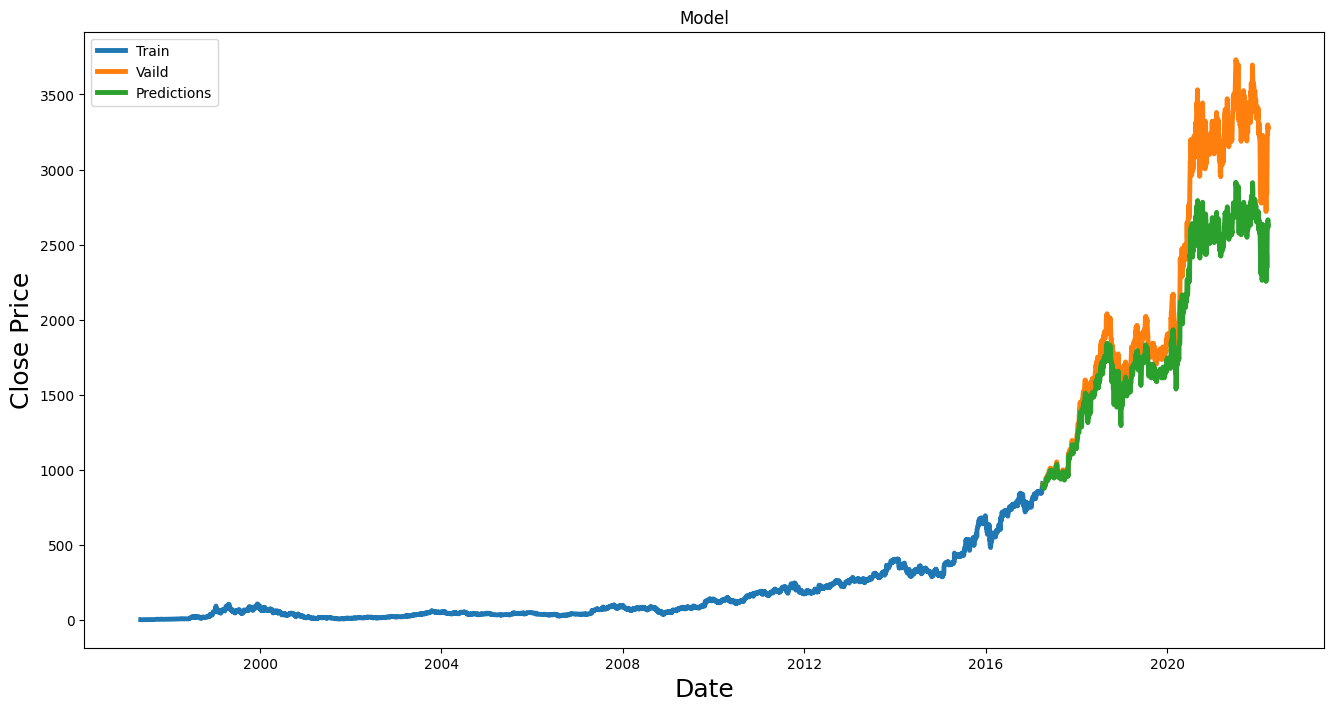

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'], linewidth=3.5)
plt.plot(valid[['Close', 'Predictions']], linewidth=3.5)
plt.legend(['Train', 'Vaild', 'Predictions'], loc='upper left')
plt.show()

In [25]:
valid

,Close,Predictions
Date,,
2017-04-06,898.280029,899.447205
2017-04-07,894.880005,887.606445
2017-04-10,907.039978,884.618530
2017-04-11,902.359985,898.134399
2017-04-12,896.229980,893.812012
...,...,...
2022-03-18,3225.010010,2594.854248
2022-03-21,3229.830078,2637.216797
2022-03-22,3297.780029,2616.996582
